**GroupBy (split, apply, combine)**

1. splits the data based on the key provided
2. apply the aggregate function such as max, average etc for each 
3. combine the results of the same group

In [1]:
import pandas as pd

In [9]:
input_data = pd.read_csv('titanic_train.csv')
sample_data = input_data.head(10)
sample_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
# grouping the data based on sex

sex_Data = sample_data.groupby('Sex')
sex_Data
for sex, sexdf in sex_Data:
    print(sex)
    print(sexdf)

female
   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN       

In [18]:
# Getting the records of specific group

# Getting the male group
male = sex_Data.get_group('male')
male

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [19]:
# Getting the male group
female = sex_Data.get_group('female')
female

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
sex_Data['Age'].max()

Sex
female    38.0
male      54.0
Name: Age, dtype: float64

In [26]:
sex_Data.describe()

PassengerId                                          Survived       \
             count mean       std  min  25%  50%  75%   max    count mean   
Sex                                                                         
female         5.0  5.6  3.646917  2.0  3.0  4.0  9.0  10.0      5.0  1.0   
male           5.0  5.4  2.701851  1.0  5.0  6.0  7.0   8.0      5.0  0.0   

        ... Parch       Fare                                                \
        ...   75%  max count      mean        std    min      25%      50%   
Sex     ...                                                                  
female  ...   0.0  2.0   5.0  34.70248  27.251685  7.925  11.1333  30.0708   
male    ...   0.0  1.0   5.0  19.33916  19.057589  7.250   8.0500   8.4583   

                         
           75%      max  
Sex                      
female  53.100  71.2833  
male    21.075  51.8625  

[2 rows x 56 columns]

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

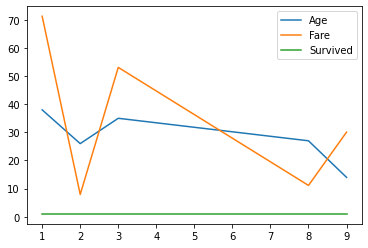

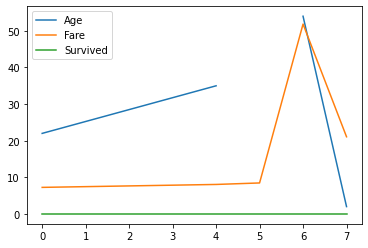

In [32]:
%matplotlib inline
sex_Data[['Age','Fare','Survived']].plot()

**Multiple Aggregate Functions**

In [41]:
sample_data.groupby('Sex')[['Age','Fare','Survived']].aggregate([min, max, 'mean'])

Age                Fare                    Survived         
         min   max   mean    min      max      mean      min max mean
Sex                                                                  
female  14.0  38.0  28.00  7.925  71.2833  34.70248        1   1  1.0
male     2.0  54.0  28.25  7.250  51.8625  19.33916        0   0  0.0

In [40]:
agg_fun = {'Age':[min,max], 'Fare':'mean'}
sample_data.groupby('Sex')[['Age','Fare']].aggregate(agg_fun)

Age            Fare
         min   max      mean
Sex                         
female  14.0  38.0  34.70248
male     2.0  54.0  19.33916